## SMOTE(Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

SMOTE (Synthetic Minority Over-sampling Technique) একটি মেশিন লার্নিং টেকনিক, যা ইমব্যালান্সড ডেটাসেটগুলোতে ব্যবহৃত হয়, যেখানে মাইনোরিটি ক্লাসের (কম সংখ্যা থাকা শ্রেণি) ইনস্ট্যান্সগুলো মেজোরিটি ক্লাসের (বেশি সংখ্যা থাকা শ্রেণি) তুলনায় অনেক কম থাকে। SMOTE মাইনোরিটি ক্লাসের নতুন স্যান্তেটিক (কৃত্রিম) ইনস্ট্যান্স তৈরি করে, যা বিদ্যমান ইনস্ট্যান্সগুলোর মধ্যে ইন্টারপোলেশন (অন্তর্বর্তী মান সৃষ্টি) এর মাধ্যমে তৈরি করা হয়।

এভাবে, SMOTE মূলত মাইনোরিটি ক্লাসের ইনস্ট্যান্সগুলির সংখ্যা বাড়ানোর জন্য নতুন ডেটা পয়েন্ট তৈরি করে, যা মডেলের প্রশিক্ষণকে আরও ভালোভাবে কাজ করতে সহায়ক হয় এবং শ্রেণীবিভাগে ভারসাম্য আনে

In [1]:
from sklearn.datasets import make_classification

In [2]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                   weights=[0.90],random_state=12) 

In [3]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [4]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

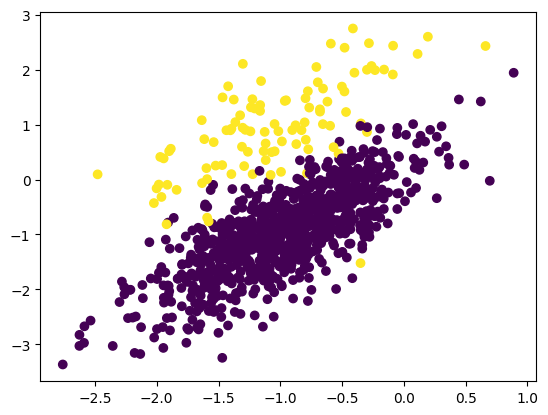

In [5]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [6]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
## transform the dataset
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [9]:
X.shape

(1800, 2)

In [10]:
y.shape

(1800,)

In [11]:
len(y[y==0])

900

In [12]:
len(y[y==1])

900

In [13]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

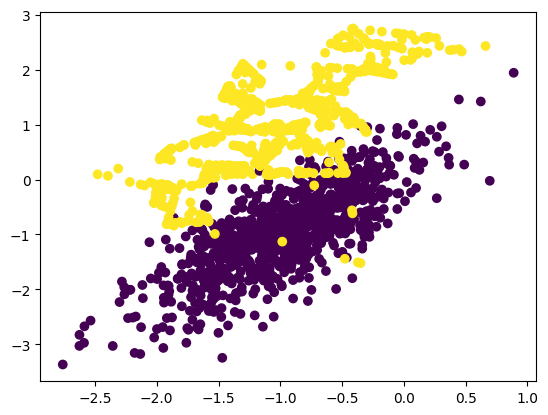

In [14]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])